<a href="https://colab.research.google.com/github/JakeOh/20230228_itwill_java140_lab_python/blob/main/py17_seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 패키지 임포트

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# tips 데이터셋

In [2]:
tips = sns.load_dataset('tips')

In [3]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# Box plot

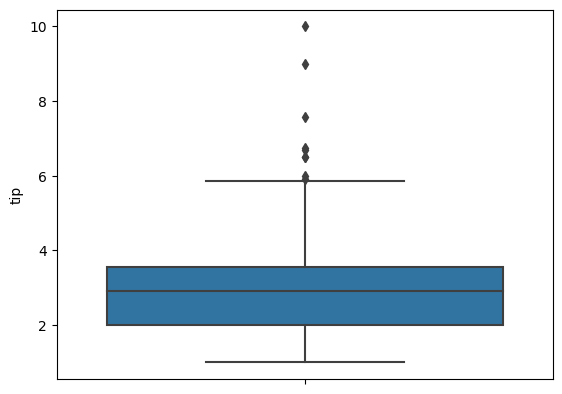

In [5]:
# tip 컬럼의 box plot
sns.boxplot(data=tips, y='tip')
plt.show()

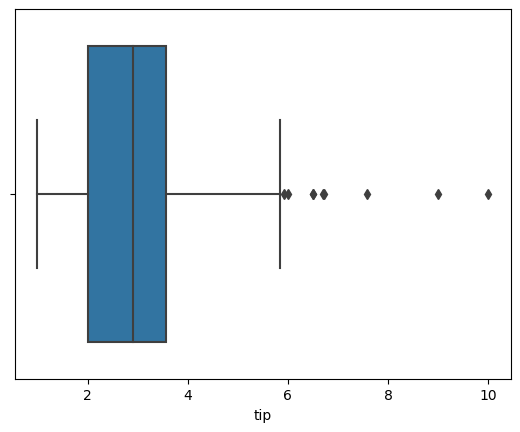

In [6]:
sns.boxplot(data=tips, x='tip')
plt.show()

## 그룹(카테고리)별 box plot

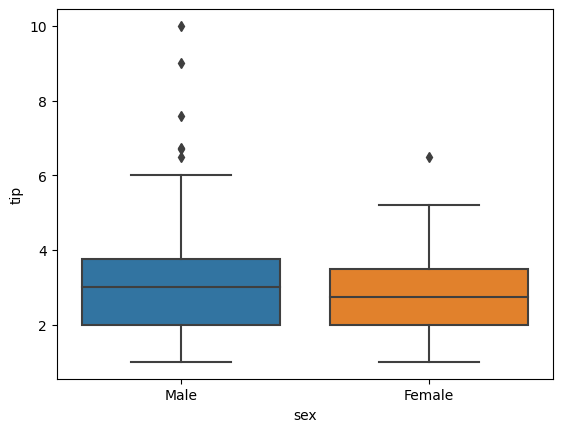

In [7]:
# 성별 tip의 box plot
sns.boxplot(data=tips, x='sex', y='tip')
plt.show()

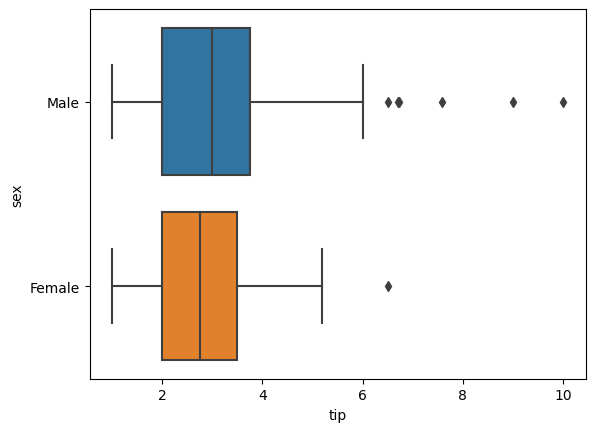

In [8]:
sns.boxplot(data=tips, x='tip', y='sex')
plt.show()

요일별 tip의 box plot

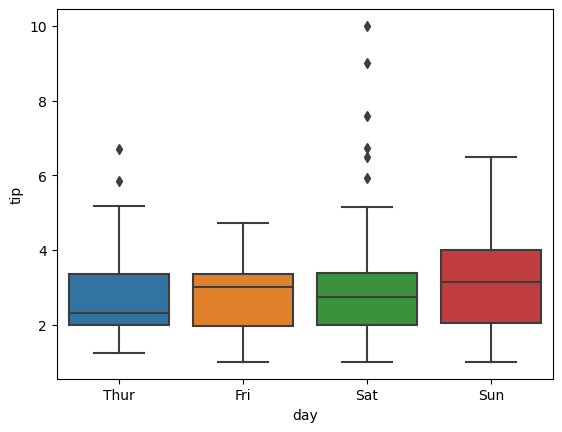

In [9]:
sns.boxplot(data=tips, x='day', y='tip')
plt.show()